In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/temprel.csv')
df.head()

,timestamp,open,high,low,close,adjusted_close,volume,dividend_amount,split_coefficient
0,10-02-2023,2357.0000,2357.0000,2321.6001,2336.3501,2336.3501,127318,0.0,1.0
1,09-02-2023,2357.3501,2370.8000,2334.0500,2355.3999,2355.3999,88852,0.0,1.0
2,08-02-2023,2311.3000,2359.6001,2307.1499,2351.8000,2351.8000,268850,0.0,1.0
3,07-02-2023,2312.0000,2327.0000,2293.1001,NaN,2305.8999,225094,0.0,1.0
4,06-02-2023,2325.0000,2325.0000,2306.7500,2311.5000,2311.5000,206263,0.0,1.0


In [3]:
def replace_with_average(df, column, index):
    if index < 2 or index > len(df[column]) - 3:
        # The element cannot be replaced, return the original DataFrame
        return df
    else:
        subset = df.iloc[index-2:index+3][column]
        average = subset.mean()
        df.at[index, column] = average
        return df

In [4]:
arr=df['close'].isnull()

In [5]:
for i in range(0, len(arr)-1):
  if arr[i]==True:
    df=replace_with_average(df, 'close', i)

In [6]:
df.head()

,timestamp,open,high,low,close,adjusted_close,volume,dividend_amount,split_coefficient
0,10-02-2023,2357.0000,2357.0000,2321.6001,2336.350100,2336.3501,127318,0.0,1.0
1,09-02-2023,2357.3501,2370.8000,2334.0500,2355.399900,2355.3999,88852,0.0,1.0
2,08-02-2023,2311.3000,2359.6001,2307.1499,2351.800000,2351.8000,268850,0.0,1.0
3,07-02-2023,2312.0000,2327.0000,2293.1001,2336.937475,2305.8999,225094,0.0,1.0
4,06-02-2023,2325.0000,2325.0000,2306.7500,2311.500000,2311.5000,206263,0.0,1.0


##Model

In [7]:
# Create a new dataframe with only the 'Close' column 
data = df.filter(['close'])
# Convert the dataframe to a numpy array
dataset = data.values

# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .6 ))

window_size = 60
training_data_len

2679

In [8]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# create scaler
scaler = StandardScaler()
# fit and transform in one step
scaled_data = scaler.fit_transform(dataset)

print ('scaled_data.shape',len(scaled_data))
scaled_data

scaled_data.shape 4464


array([[ 1.64216361],
       [ 1.67308514],
       [ 1.66724181],
       ...,
       [-1.50718783],
       [-1.50609558],
       [-1.49117047]])

In [9]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len)]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(window_size, len(train_data)):
    x_train.append(train_data[i-window_size:i, 0])
    y_train.append(train_data[i, 0])
    if i<= window_size + 1:
        print('x_train',x_train)
        print('\ny_train',y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
print ('x_train.shape:',x_train.shape)

x_train [array([1.64216361, 1.67308514, 1.66724181, 1.64311704, 1.60182707,
       1.63031413, 1.62666195, 1.64492288, 1.64561274, 1.66643021,
       1.64443592, 1.71780431, 1.77007101, 1.7935265 , 1.81479018,
       1.86088907, 1.86657025, 1.87298171, 1.81803657, 1.87568031,
       1.86251226, 1.94919069, 2.00186335, 2.06451865, 1.96826322,
       1.92971235, 1.93726004, 2.00032131, 2.02978213, 1.9860372 ,
       1.97686615, 1.97995022, 1.98092414, 1.94756749, 1.91031518,
       2.03424591, 2.04479668, 2.10444907, 2.04958522, 2.01346935,
       2.03562579, 2.09430411, 2.10939998, 2.1097652 , 2.08488991,
       2.1504668 , 2.15111592, 2.21336559, 2.2046005 , 2.26920331,
       2.26969043, 2.28502946, 2.25037442, 2.24550484, 2.09779414,
       2.04179393, 1.99942855, 2.01217063, 2.03749246, 2.06614185])]

y_train [2.0722288264819695]

x_train [array([1.64216361, 1.67308514, 1.66724181, 1.64311704, 1.60182707,
       1.63031413, 1.62666195, 1.64492288, 1.64561274, 1.66643021,
       1.64

In [10]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
import tensorflow as tf

def build_LSTM_model():
    input = tf.keras.layers.Input(
        shape=(x_train.shape[1], 1), name ="input"
    )
    x = tf.keras.layers.Bidirectional(LSTM(128, return_sequences=True))(input)
    
    x = tf.keras.layers.Bidirectional(LSTM(64, return_sequences=False, dropout=0.5))(x)
    
    x = tf.keras.layers.Dense(25 , activation="relu", name ="dense_1")(x)
    
    output = tf.keras.layers.Dense(1, name="last_dense")(x)
               
    model = tf.keras.Model(inputs=input, outputs=output)
    
    return model

LSTM_model = build_LSTM_model()
LSTM_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 60, 1)]           0         
                                                                 
 bidirectional (Bidirectiona  (None, 60, 256)          133120    
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              164352    
 nal)                                                            
                                                                 
 dense_1 (Dense)             (None, 25)                3225      
                                                                 
 last_dense (Dense)          (None, 1)                 26        
                                                                 
Total params: 300,723
Trainable params: 300,723
Non-trainable

In [11]:
epochs = 50
batch_size = 500
early_stopping_patience = 17


# Compile the model
LSTM_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = LSTM_model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs)

Epoch 1/50
6/6 [==============================] - 23s 53ms/step - loss: 0.3616
Epoch 2/50
6/6 [==============================] - 0s 34ms/step - loss: 0.0880
Epoch 3/50
6/6 [==============================] - 0s 32ms/step - loss: 0.0528
Epoch 4/50
6/6 [==============================] - 0s 31ms/step - loss: 0.0347
Epoch 5/50
6/6 [==============================] - 0s 33ms/step - loss: 0.0294
Epoch 6/50
6/6 [==============================] - 0s 32ms/step - loss: 0.0218
Epoch 7/50
6/6 [==============================] - 0s 32ms/step - loss: 0.0177
Epoch 8/50
6/6 [==============================] - 0s 32ms/step - loss: 0.0150
Epoch 9/50
6/6 [==============================] - 0s 32ms/step - loss: 0.0127
Epoch 10/50
6/6 [==============================] - 0s 33ms/step - loss: 0.0113
Epoch 11/50
6/6 [==============================] - 0s 32ms/step - loss: 0.0103
Epoch 12/50
6/6 [==============================] - 0s 31ms/step - loss: 0.0103
Epoch 13/50
6/6 [==============================] - 0s 33ms/s

dict_keys(['loss'])


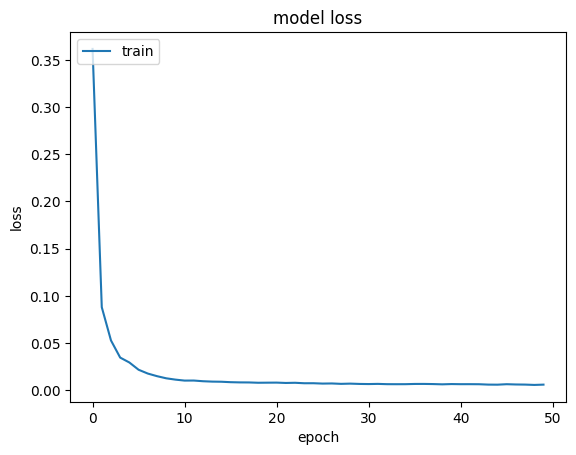

In [12]:
# list all data in history
print(history.history.keys())

# summarize history for loss

fig, ax = plt.subplots()
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [13]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - window_size: ]
print ('len(test_data):', len(test_data))

# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(window_size, len(test_data)):
    x_test.append(test_data[i-window_size:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = LSTM_model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


len(test_data): 1845
56/56 [==============================] - 2s 6ms/step


<ipython-input-14-6511bb59e7ba>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = predictions


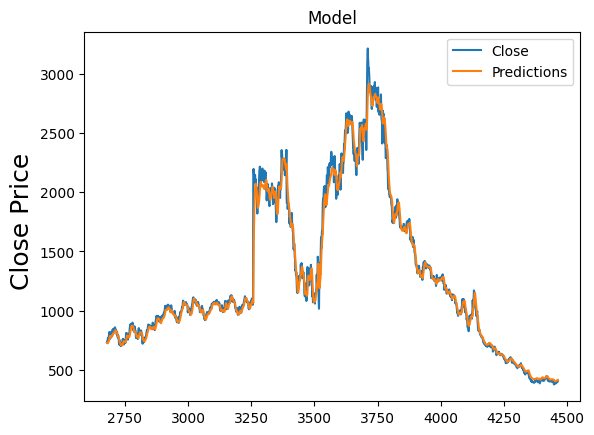

In [14]:
# Plot the data
train = data[:training_data_len]
test = data[training_data_len:]
test['Predictions'] = predictions

# Visualize the data
plt.figure()
plt.title('Model')
plt.ylabel('Close Price ', fontsize=18)
#plt.plot(train['Close'])
plt.plot(test[['close', 'Predictions']])
plt.legend(['Close', 'Predictions'], loc='upper right')
plt.show()

In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
mae = mean_absolute_error(test['Predictions'],y_test)
mse = mean_squared_error(test['Predictions'], y_test)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(test['Predictions'],y_test)
r = r2_score(test['Predictions'], y_test)

In [16]:
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Percentage Error:', mape)
print('R-Squared Score = {}'.format(r))

Mean Absolute Error: 40.689584376203605
Mean Squared Error: 5165.785907908205
Root Mean Squared Error: 71.87340195029178
Mean Absolute Percentage Error: 0.03029114203599597
R-Squared Score = 0.987390566355878
